### Titanic - Machine Learning from Disaster (Nov 2022)

![image](Result/result.png)

- Information about me
    - **Muditya Raghav**
    - **mudityadev@gmail.com**
    - [Muditya Portfolio](https://mudityadev.github.io/)


- **Objective** - use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
- **Solution** - you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
# important library import
import numpy as np # linear algebra
import pandas as pd # i/o csv
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read both data - test and train csv files
train = pd.read_csv("data/train.csv")
test =  pd.read_csv("data/test.csv")

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])

In [4]:
# columns of training dataset
# for c in train.columns:
#     print(c)

list(train.columns)
# len(list(train.columns))

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'train_test']

# Better data goes in => Better Model Perform

## Light Data Exploration

1. Numerical Data
- make histrogram for understanding of distribution
- corrplot
- pivot table survival rate across numeric var

2. Categorial Data
- bar charts - balance of classes
- pivot table - relationship with survival

In [6]:
# data-types and null-count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [7]:
# for numeric data -> .describe()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [8]:
# quick way to separate numerical values
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [9]:
# Separate the numeric and categorical data
train_num = train[['Age', 'SibSp','Parch','Fare']] # understand by histogram
train_cat = train[['Survived', 'Pclass','Sex','Ticket','Cabin','Embarked']] # value_counts

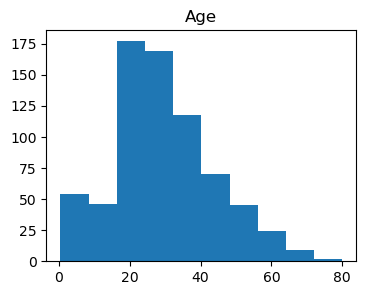

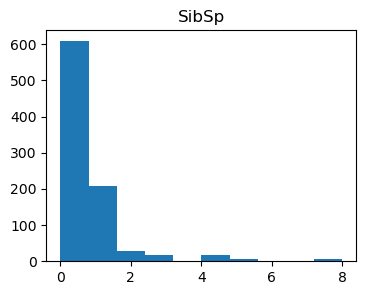

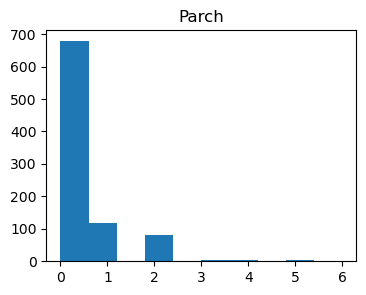

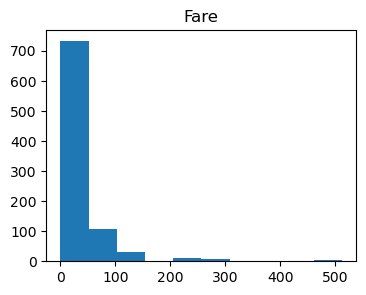

In [10]:
# distribution of all numeric var
for n in train_num.columns:
    plt.figure(figsize=(4,3))
    plt.hist(train_num[n])
    plt.title(n)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

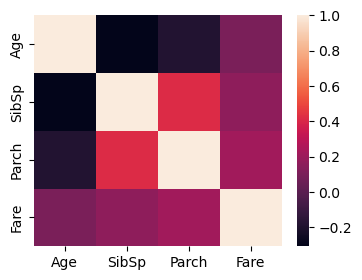

In [11]:
# corelation b/w numeric data
print(train_num.corr())
plt.figure(figsize = (4,3))
sns.heatmap(train_num.corr())

In [12]:
# Compare the rate of survival w.r.t Age, SibSp, Parch, and Fare
pd.pivot_table(train, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


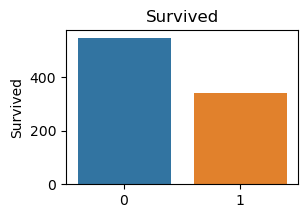

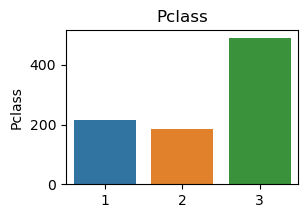

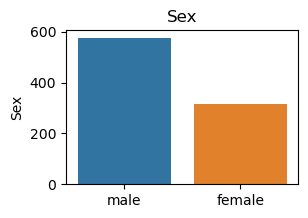

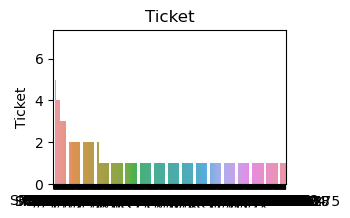

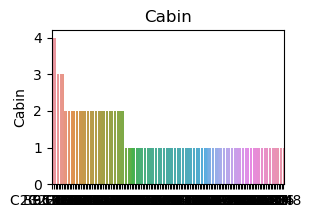

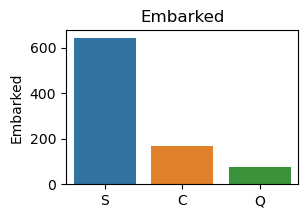

In [13]:
# bar-plot for categorial data
for i in train_cat.columns:
    plt.figure(figsize=(3,2))
    sns.barplot(x=train_cat[i].value_counts().index,y=train_cat[i].value_counts()).set_title(i)
    plt.show()

In [14]:
# compare survival w.r.t categorical variable
print(pd.pivot_table(train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()

print(pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()

print(pd.pivot_table(train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



## Feature Engineering
1. Cabin - Simpify cabins
2. Ticket - rates impact survival rate?
3. does person title related to survival rate?

In [15]:
train_cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))

In [16]:
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [17]:
# compare survival rate w.r.t to cabin
pd.pivot_table(train, index='Survived', columns='cabin_multiple', values= 'Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [18]:
train['cabin_adv'] = train.Cabin.apply(lambda x : str(x)[0])

In [19]:
print("n = stands for Null")
print(train['cabin_adv'].value_counts())

# compare survival rate w.r.t to cabin letter
pd.pivot_table(train, index='Survived', columns='cabin_adv', values= 'Ticket',aggfunc='count')

n = stands for Null
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
# understand of ticket values - numeric vs non-numeric
train['numeric_ticket'] = train.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x : ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)


In [21]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [22]:
# all the tickets in all lows
# pd.set_option("max_rows", None)
pd.options.display.max_rows = len(train['ticket_letters'].value_counts())
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [23]:
# compare of survival rate w.r.t to ticket
pd.pivot_table(train, index='Survived', columns='numeric_ticket', values= 'Ticket',aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [24]:
# compare of survival rate w.r.t to ticket types
pd.pivot_table(train, index='Survived', columns='ticket_letters', values= 'Ticket',aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [25]:
# feature engineering on person title
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())
#mr., ms.,mrs. etc

In [26]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

## Data Preprocessing from Model

1. Drop null values from embarked
2. Only select relevent data variable
3. Categorical transforms on all data
4. Data with mean for fare and age
5. Normalized fare using logarithm
6. Scaled data 0-1 with standard scaler

**Below Code is partically from ken-jee notebook** - https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

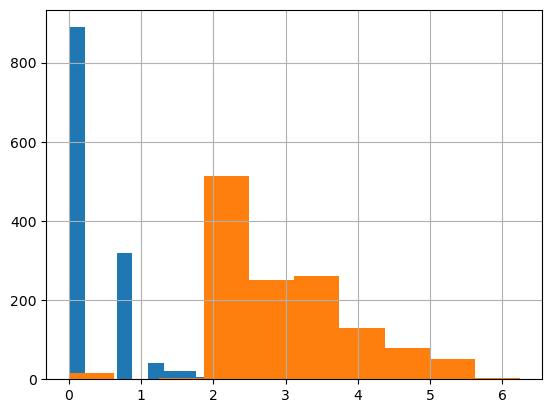

In [27]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(train.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)


In [28]:

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [29]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

## Build Model - Baseline Validation Performance

- Logistic Regression **(Result - 0.82)**
- K Nearest Neighbor **(Result - 0.81)**
- **(overfitted)** Support Vector Classifier **(Result - 0.833)**
- **(Best)** Soft Voting Classifier **(collective result of all model - 0.82)**

In [30]:
# import all algorithms of machine learning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [31]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)

print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [32]:
# K Nearest Neighbor
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80337079 0.80898876 0.82022472 0.85310734]
0.8110709071288008


F:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
F:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [33]:
# Support Vector Classifier
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [34]:
# Soft Voting Classifier (collective result of all model)
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.8258427  0.80337079 0.86440678]
0.8268139402018664


In [45]:
# used Soft Voting Classifier for final result
voting_clf.fit(X_train_scaled, y_train)
pred = voting_clf.predict(X_test_scaled).astype(int)

In [49]:
# final result in submission.csv
final_data = {'PassengerId': test.PassengerId, 'Survived': pred}
submission = pd.DataFrame(data=final_data)
submission.to_csv('submission.csv', index=False)

In [50]:
# Thank you
# Muditya Raghav
# Visit my other project on github - https://github.com/mudityadev